# Fuzzy project
# ALM modeling for sinc function
# Sajad Hosseini Najafabadi - 400301997
# --------------------------------------------------------

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

## Generating data:

In [3]:
m = 200 # Number of data samples
# Generating data in [-5, 5] interval for inputs => x1 and x2 are effective inputs:
x1 = np.random.default_rng(seed=1).uniform(low=-5, high=5, size=(m,))
x2 = np.random.default_rng(seed=2).uniform(low=-5, high=5, size=(m,))

# Generating 2 dummy inputs:
x3 = np.random.default_rng(seed=3).uniform(low=-5, high=5, size=(m,))
x4 = np.random.default_rng(seed=4).uniform(low=-5, high=5, size=(m,))

# Generating white gaussian noise with zero mean and standard deviation of 1:
noise_gaussian = np.random.default_rng(seed=0).normal(0,1,m)

# Defining sinc function:
def sinc(x1, x2, noise=False):
    r = np.sqrt(x1**2 + x2**2)
    if noise:
        y = np.sinc(r/5) + noise_gaussian
    else:
        y = np.sinc(r/5)
    return y

y = sinc(x1, x2, noise=True)

### Let's see the y-x planes:

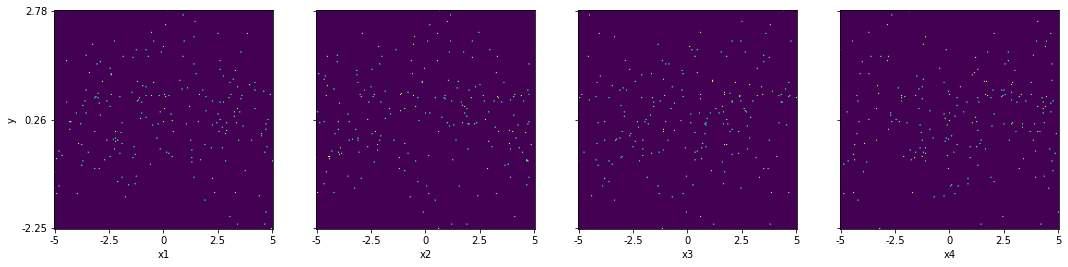

In [7]:
y_range = np.arange(y.min(), y.max(), (y.max() - y.min()) / m)
y_range = np.append(y_range, y.max())

x_range = np.arange(x1.min(), x1.max(), (x1.max() - x1.min()) / m)
x_range = np.append(x_range, x1.max())
def plane(y, x):
    y_x = np.zeros((1+m, 1+m))
    for t in range(m):
        yt = m - abs(y_range - y[t]).argmin()
        xt = abs(x_range - x[t]).argmin()
        y_x[yt, xt] = 1
    return y_x
        
y_x1 = plane(y, x1)

y_x2 = plane(y, x2)

y_x3 = plane(y, x3)

y_x4 = plane(y, x4)

plt.figure(figsize=[18,5])

plt.subplot(1,4,1)
plt.xticks(ticks=[0, 50, 100, 150, 200], labels=[-5, -2.5, 0, 2.5, 5])
plt.yticks(ticks=[0, 100, 200], labels=[2.78, 0.26, -2.25])
plt.xlabel('x1')
plt.ylabel('y')
plt.imshow(y_x1)

plt.subplot(1,4,2)
plt.xticks(ticks=[0, 50, 100, 150, 200], labels=[-5, -2.5, 0, 2.5, 5])
plt.yticks(ticks=[0, 100, 200], labels=[])
plt.xlabel('x2')
plt.imshow(y_x2)

plt.subplot(1,4,3)
plt.xticks(ticks=[0, 50, 100, 150, 200], labels=[-5, -2.5, 0, 2.5, 5])
plt.yticks(ticks=[0, 100, 200], labels=[])
plt.xlabel('x3')
plt.imshow(y_x3)

plt.subplot(1,4,4)
plt.xticks(ticks=[0, 50, 100, 150, 200], labels=[-5, -2.5, 0, 2.5, 5])
plt.yticks(ticks=[0, 100, 200], labels=[])
plt.xlabel('x4')
plt.imshow(y_x4)

### Here, unlike Seddel function, it is not possible to distinguish dummy inputs from the data distribution. In fact, it can be guessed that the modeling might be difficult for the sinc function.
### Let's find out. We should apply the IDS operator to the x-y planes.
### First we need to find the proper spread radius:

In [8]:
def spread_radius(y_x):
    y, x = np.where(y_x == 1)
    save_d = 0
    for i in range(len(y)):
        for d in range(m):
            if y_x[max((y[i]-d),0) : 1+min((y[i]+d),1+m), max((x[i]-d),0) : 1+min((x[i]+d),1+m)].sum() > 1:
                if d > save_d:
                    save_d = d
                break
    if save_d % 2 == 0:
        save_d += 1
        
    return save_d

### The spread radius for different planes is as follows:

In [9]:
r1 = spread_radius(y_x1)
r2 = spread_radius(y_x2)
r3 = spread_radius(y_x3)
r4 = spread_radius(y_x4)

print(f'r1 = {r1} | r2 = {r2} | r3 = {r3} | r4 = {r4}')

r1 = 21 | r2 = 23 | r3 = 29 | r4 = 27


### Now create IDS operator function:

In [10]:
def IDS(y_x):
    r = spread_radius(y_x)
    c = math.ceil(r/2)
    ids = np.zeros((r,r))
    d = c-1
    for i in range(r):
        for j in range(r):
            k = max(abs(i-d), abs(j-d))
            ids[i, j] = (c-k) / c 
    ids[d, d] = 0
    
    y, x = np.where(y_x == 1)
    for i in range(len(y)):
        y_x[max((y[i]-d),0) : 1+min((y[i]+d),1+m), max((x[i]-d),0) : 1+min((x[i]+d),1+m)] +=\
        ids[d-y[i]+max((y[i]-d),0) : d-y[i]+1+min((y[i]+d),m), d-x[i]+max((x[i]-d),0) : d-x[i]+1+min((x[i]+d),m)]
    y_x = y_x / y_x.max()    
    
    return y_x

### applying the IDS operator to the x-y planes.

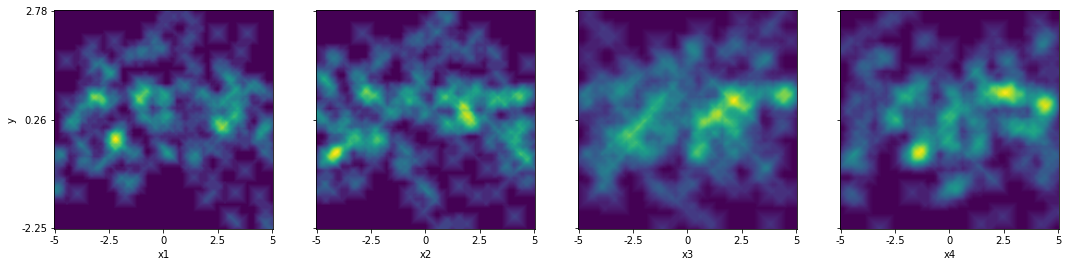

In [12]:
y_x1 = IDS(y_x1)
y_x2 = IDS(y_x2)
y_x3 = IDS(y_x3)
y_x4 = IDS(y_x4)

plt.figure(figsize=[18,5])

plt.subplot(1,4,1)
plt.xticks(ticks=[0, 50, 100, 150, 200], labels=[-5, -2.5, 0, 2.5, 5])
plt.yticks(ticks=[0, 100, 200], labels=[2.78, 0.26, -2.25])
plt.xlabel('x1')
plt.ylabel('y')
plt.imshow(y_x1)

plt.subplot(1,4,2)
plt.xticks(ticks=[0, 50, 100, 150, 200], labels=[-5, -2.5, 0, 2.5, 5])
plt.yticks(ticks=[0, 100, 200], labels=[])
plt.xlabel('x2')
plt.imshow(y_x2)

plt.subplot(1,4,3)
plt.xticks(ticks=[0, 50, 100, 150, 200], labels=[-5, -2.5, 0, 2.5, 5])
plt.yticks(ticks=[0, 100, 200], labels=[])
plt.xlabel('x3')
plt.imshow(y_x3)

plt.subplot(1,4,4)
plt.xticks(ticks=[0, 50, 100, 150, 200], labels=[-5, -2.5, 0, 2.5, 5])
plt.yticks(ticks=[0, 100, 200], labels=[])
plt.xlabel('x4')
plt.imshow(y_x4)

### Now we need to find the narrow path for each IDS plane:

In [13]:
def NP(y_x):
    narrow_path = np.zeros((1+m, 1+m))
    for i in range(m):
        save_m = 10**10
        for j in range(m):
            mass = abs(y_x[:j, i].sum() - y_x[1+j:, i].sum())
            if mass < save_m:
                save_m = mass
                idx = j
        narrow_path[idx, i] = 1
        
    return narrow_path

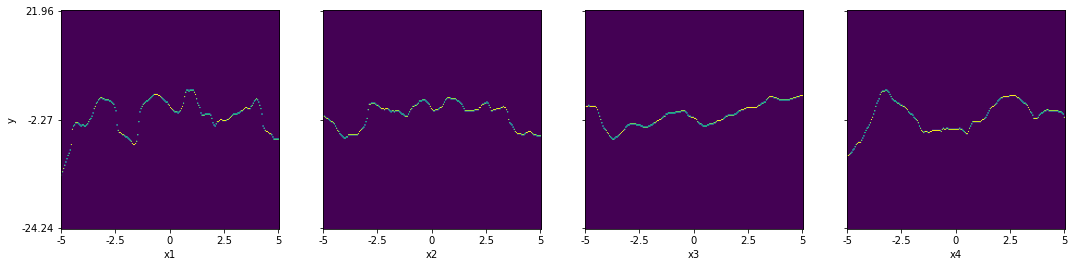

In [14]:
narrow_path_y_x1 = NP(y_x1)
narrow_path_y_x2 = NP(y_x2)
narrow_path_y_x3 = NP(y_x3)
narrow_path_y_x4 = NP(y_x4)

plt.figure(figsize=[18,5])

plt.subplot(1,4,1)
plt.xticks(ticks=[0, 50, 100, 150, 200], labels=[-5, -2.5, 0, 2.5, 5])
plt.yticks(ticks=[0, 100, 200], labels=[21.96, -2.27, -24.24])
plt.xlabel('x1')
plt.ylabel('y')
plt.imshow(narrow_path_y_x1)

plt.subplot(1,4,2)
plt.xticks(ticks=[0, 50, 100, 150, 200], labels=[-5, -2.5, 0, 2.5, 5])
plt.yticks(ticks=[0, 100, 200], labels=[])
plt.xlabel('x2')
plt.imshow(narrow_path_y_x2)

plt.subplot(1,4,3)
plt.xticks(ticks=[0, 50, 100, 150, 200], labels=[-5, -2.5, 0, 2.5, 5])
plt.yticks(ticks=[0, 100, 200], labels=[])
plt.xlabel('x3')
plt.imshow(narrow_path_y_x3)

plt.subplot(1,4,4)
plt.xticks(ticks=[0, 50, 100, 150, 200], labels=[-5, -2.5, 0, 2.5, 5])
plt.yticks(ticks=[0, 100, 200], labels=[])
plt.xlabel('x4')
plt.imshow(narrow_path_y_x4)

### Confidence degree for each narrow path is as follows:

In [15]:
cd1 = 1/r1
cd2 = 1/r2
cd3 = 1/r3
cd4 = 1/r4

print(f'cd1 = {cd1:.3f} | cd2 = {cd2:.3f} | cd3 = {cd3:.3f} | cd4 = {cd4:.3f}')

cd1 = 0.048 | cd2 = 0.043 | cd3 = 0.034 | cd4 = 0.037


### So, the effective inputs are as follows:
### x1, x2, x4, x3 with confidence degree of 0.048, 0.043, 0.037 and 0.034
### Same result as TS model! (i.e. x3 and x4 are dummy inputs!)
### As a result, in the ALM and Takagi-Sugeno model, the dummy inputs are identified for the sinc function, but in the Sugeno-Yasukawa model, it was not identified.
### Now we have SISO models like:
### If input is $x_i$ then y is $NP_i$ with C.D = $cd_i$
### x1:

In [16]:
y_hat = np.zeros(m)
for t in range(m):
    k = abs(x_range -x1[t]).argmin()
    k = m - narrow_path_y_x1[:,k].argmax()
    y_hat[t] = y_range[k]

e = ((y - y_hat)**2).sum() / m
print(f'Error for x1 is: {e:.2f}')

Error for x1 is: 0.93


### x2:

In [17]:
y_hat = np.zeros(m)
for t in range(m):
    k = abs(x_range -x2[t]).argmin()
    k = m - narrow_path_y_x2[:,k].argmax()
    y_hat[t] = y_range[k]

e = ((y - y_hat)**2).sum() / m
print(f'Error for x2 is: {e:.2f}')

Error for x2 is: 1.00


### x3:

In [18]:
y_hat = np.zeros(m)
for t in range(m):
    k = abs(x_range -x3[t]).argmin()
    k = m - narrow_path_y_x3[:,k].argmax()
    y_hat[t] = y_range[k]

e = ((y - y_hat)**2).sum() / m
print(f'Error for x3 is: {e:.2f}')

Error for x3 is: 1.05


### x4:

In [19]:
y_hat = np.zeros(m)
for t in range(m):
    k = abs(x_range -x4[t]).argmin()
    k = m - narrow_path_y_x4[:,k].argmax()
    y_hat[t] = y_range[k]

e = ((y - y_hat)**2).sum() / m
print(f'Error for x4 is: {e:.2f}')

Error for x4 is: 1.10


### It works as well as the two previous models!
### So for sinc function the errors are as follows:
### x1, x2, x3, x4 with 0.93, 1, 1.05, 1.1
### It means that it has recognized the dummy inputs correctly.
### Recall that the error for the Sugeno-Yasukawa and Takagi-Sugeno model was as follows:
### Sugeno-Yasukawa: x1, x4, x3, x2 with 1.05, 1.07, 1.08, 1.16
### Takagi-Sugeno: x2, x1, x4, x3 with 0.07, 0.07, 0.12, 0.12
### It means that the Takagi-Sugeno model and ALM are more accurate than the Sugeno-Yasukawa.

## x2-x1 with two rules:

In [20]:
y_hat = np.zeros(m)
for t in range(m):
    k = abs(x_range -x2[t]).argmin()
    k = m - narrow_path_y_x2[:,k].argmax()
    y2 = y_range[k]
    
    k = abs(x_range -x1[t]).argmin()
    k = m - narrow_path_y_x1[:,k].argmax()
    y1 = y_range[k]
    
    # composition rule of inference
    y_hat[t] = (y1 * cd1 + y2 * cd2) / (cd1 + cd2)

e = ((y - y_hat)**2).sum() / m
print(f'Error for x2-x1 with two rules is: {e:.2f}')

Error for x2-x1 with two rules is: 0.90


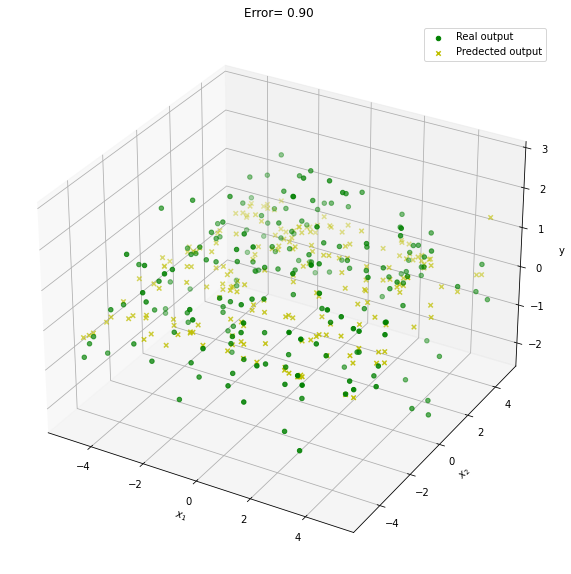

In [21]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter (x1, x2, y, c='g', marker='o')
ax.scatter (x1, x2, y_hat, c='y', marker='x')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('y')
ax.set_title(f'Error= {e:.2f}')
plt.legend(['Real output','Predected output'])

### Can the error still be reduced? Let's check x2-x1 with four rules:
### Splitting data based on dynamic range:

In [22]:
ds = np.concatenate((x1[:, None], x2[:, None], y[:, None]), axis = 1)
ds = sorted(ds,key=lambda x: x[1])
ds1 = ds[:100]
ds2 = ds[100:]
x1_x2s, x2_x2s, y_x2s= [np.array(ds1)[:,i] for i in range(3)]
x1_x2b, x2_x2b, y_x2b= [np.array(ds2)[:,i] for i in range(3)]

In [23]:
ds = np.concatenate((x1[:, None], x2[:, None], y[:, None]), axis = 1)
ds = sorted(ds,key=lambda x: x[0])
ds1 = ds[:100]
ds2 = ds[100:]
x1_x1s, x2_x1s, y_x1s= [np.array(ds1)[:,i] for i in range(3)]
x1_x1b, x2_x1b, y_x1b= [np.array(ds2)[:,i] for i in range(3)]

### for small x2:

r = 15


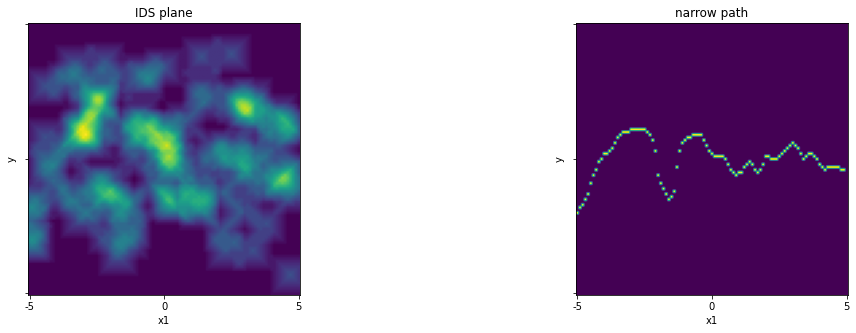

In [24]:
m=100
y_range = np.arange(y.min(), y.max(), (y.max() - y.min()) / m)
y_range = np.append(y_range, y.max())

x_range = np.arange(x1.min(), x1.max(), (x1.max() - x1.min()) / m)
x_range = np.append(x_range, x1.max())

y_x1_x2s = plane(y_x2s, x1_x2s)
r_x1_x2s = spread_radius(y_x1_x2s)
y_x1_x2s = IDS(y_x1_x2s)

narrow_path_y_x1_x2s = NP(y_x1_x2s)

print(f'r = {r_x1_x2s}')

plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.xticks(ticks=[0, 50, 100], labels=[-5, 0, 5])
plt.yticks(ticks=[0, 50, 100], labels=[])
plt.ylabel('y')
plt.xlabel('x1')
plt.title('IDS plane')
plt.imshow(y_x1_x2s)

plt.subplot(1,2,2)
plt.xticks(ticks=[0, 50, 100], labels=[-5, 0, 5])
plt.yticks(ticks=[0, 50, 100], labels=[])
plt.xlabel('x1')
plt.ylabel('y')
plt.title('narrow path')
plt.imshow(narrow_path_y_x1_x2s)

### for big x2:

r = 13


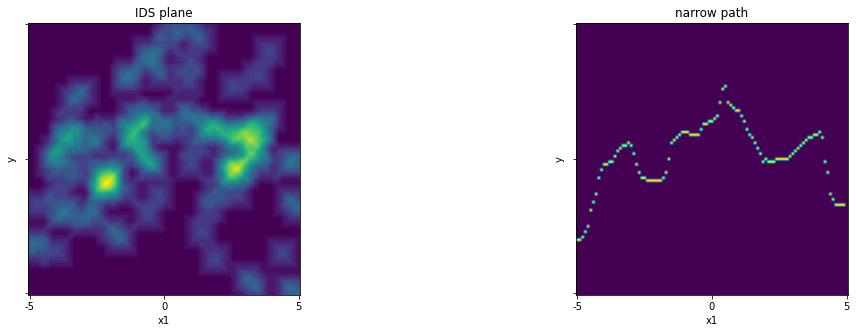

In [25]:
y_x1_x2b = plane(y_x2b, x1_x2b)
r_x1_x2b = spread_radius(y_x1_x2b)
y_x1_x2b = IDS(y_x1_x2b)
narrow_path_y_x1_x2b = NP(y_x1_x2b)

print(f'r = {r_x1_x2b}')

plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.xticks(ticks=[0, 50, 100], labels=[-5, 0, 5])
plt.yticks(ticks=[0, 50, 100], labels=[])
plt.ylabel('y')
plt.xlabel('x1')
plt.title('IDS plane')
plt.imshow(y_x1_x2b)

plt.subplot(1,2,2)
plt.xticks(ticks=[0, 50, 100], labels=[-5, 0, 5])
plt.yticks(ticks=[0, 50, 100], labels=[])
plt.xlabel('x1')
plt.ylabel('y')
plt.title('narrow path')
plt.imshow(narrow_path_y_x1_x2b)

### As we can see, the spread has decreased: from 19 to 9

### for small x1:

r = 11


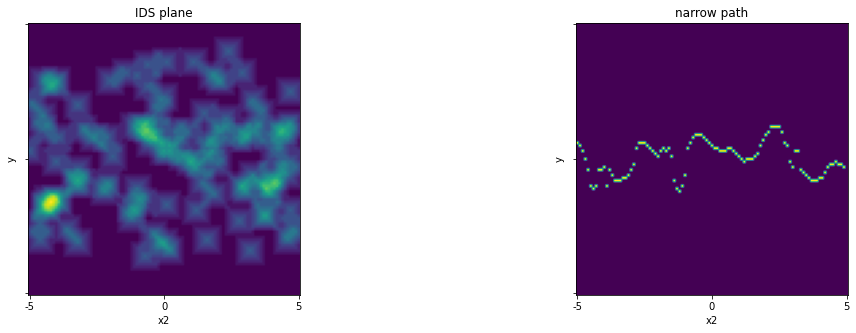

In [26]:
y_x2_x1s = plane(y_x1s, x2_x1s)
r_x2_x1s = spread_radius(y_x2_x1s)
y_x2_x1s = IDS(y_x2_x1s)
narrow_path_y_x2_x1s = NP(y_x2_x1s)

print(f'r = {r_x2_x1s}')

plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.xticks(ticks=[0, 50, 100], labels=[-5, 0, 5])
plt.yticks(ticks=[0, 50, 100], labels=[])
plt.ylabel('y')
plt.xlabel('x2')
plt.title('IDS plane')
plt.imshow(y_x2_x1s)

plt.subplot(1,2,2)
plt.xticks(ticks=[0, 50, 100], labels=[-5, 0, 5])
plt.yticks(ticks=[0, 50, 100], labels=[])
plt.xlabel('x2')
plt.ylabel('y')
plt.title('narrow path')
plt.imshow(narrow_path_y_x2_x1s)

### for big x1:

r = 17


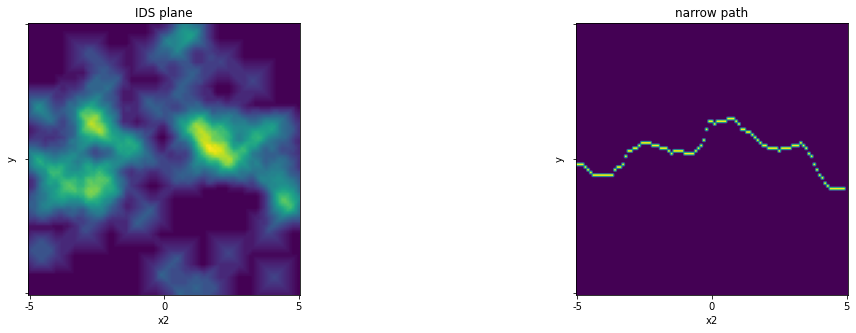

In [27]:
y_x2_x1b = plane(y_x1b, x2_x1b)
r_x2_x1b = spread_radius(y_x2_x1b)
y_x2_x1b = IDS(y_x2_x1b)
narrow_path_y_x2_x1b = NP(y_x2_x1b)

print(f'r = {r_x2_x1b}')

plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.xticks(ticks=[0, 50, 100], labels=[-5, 0, 5])
plt.yticks(ticks=[0, 50, 100], labels=[])
plt.ylabel('y')
plt.xlabel('x2')
plt.title('IDS plane')
plt.imshow(y_x2_x1b)

plt.subplot(1,2,2)
plt.xticks(ticks=[0, 50, 100], labels=[-5, 0, 5])
plt.yticks(ticks=[0, 50, 100], labels=[])
plt.xlabel('x2')
plt.ylabel('y')
plt.title('narrow path')
plt.imshow(narrow_path_y_x2_x1b)

### As we can see, the spread has decreased: from 17 to 9
## x2-x1 with four rules:


In [28]:
cd_x1_x2s = 1 / r_x1_x2s
cd_x1_x2b = 1 / r_x1_x2b
cd_x2_x1s = 1 / r_x2_x1s
cd_x2_x1b = 1 / r_x2_x1b

m = 200
y_range = np.arange(y.min(), y.max(), (y.max() - y.min()) / m)
y_range = np.append(y_range, y.max())

x_range = np.arange(x1.min(), x1.max(), (x1.max() - x1.min()) / m)
x_range = np.append(x_range, x1.max())

y_hat = np.zeros(m)
for t in range(m):
    if x2[t] <= x2_x2s.max() and x1[t] <= x1_x1s.max():
        k = abs(x_range - x1[t]).argmin()
        k = m - narrow_path_y_x1_x2s[:, math.ceil(k/2)].argmax()
        o1_x2s = y_range[k]
    
        k = abs(x_range - x2[t]).argmin()
        k = m - narrow_path_y_x2_x1s[:, math.ceil(k/2)].argmax()
        o2_x1s = y_range[k]
        
        y_hat[t] = (o1_x2s * cd_x1_x2s + o2_x1s * cd_x2_x1s) / (cd_x1_x2s + cd_x2_x1s)
        
    elif x2[t] <= x2_x2s.max() and x1[t] >= x1_x1b.min():
    
        k = abs(x_range - x1[t]).argmin()
        k = m - narrow_path_y_x1_x2s[:, math.ceil(k/2)].argmax()
        o1_x2s = y_range[k]
        
        k = abs(x_range - x2[t]).argmin()
        k = m - narrow_path_y_x2_x1b[:, math.ceil(k/2)].argmax()
        o2_x1b = y_range[k]
        
        y_hat[t] = (o1_x2s * cd_x1_x2s + o2_x1b * cd_x2_x1b) / (cd_x1_x2s + cd_x2_x1b)
        
    elif x2[t] >= x2_x2b.min() and x1[t] <= x1_x1s.max():
        
        k = abs(x_range - x1[t]).argmin()
        k = m - narrow_path_y_x1_x2b[:, math.ceil(k/2)].argmax()
        o1_x2b = y_range[k]
        
        k = abs(x_range - x2[t]).argmin()
        k = m - narrow_path_y_x2_x1s[:, math.ceil(k/2)].argmax()
        o2_x1s = y_range[k]
        
        y_hat[t] = (o1_x2b * cd_x1_x2b + o2_x1s * cd_x2_x1s) / (cd_x1_x2b + cd_x2_x1s)
    
    else:
        
        k = abs(x_range - x2[t]).argmin()
        k = m - narrow_path_y_x2_x1b[:, math.ceil(k/2)].argmax()
        o2_x1b = y_range[k]
        
        k = abs(x_range - x1[t]).argmin()
        k = m - narrow_path_y_x1_x2b[:, math.ceil(k/2)].argmax()
        o1_x2b = y_range[k]
        
        y_hat[t] = (o1_x2b * cd_x1_x2b + o2_x1b * cd_x2_x1b) / (cd_x1_x2b + cd_x2_x1b)

e = ((y - y_hat)**2).sum() / m
print(f'Error for x2-x1 with for rules is: {e:.2f}')

Error for x2-x1 with for rules is: 2.50


### It just got worse! maybe there is some kind of miss code in four rule algorithm. If not this is because the data set is small and the algorithm needs more data.
### Therefore, we select the x2-x1 with 2 rules as we got in the previous part. Let's see the final result one more time and compare with the two previous models:

In [29]:
y_hat = np.zeros(m)
for t in range(m):
    k = abs(x_range -x2[t]).argmin()
    k = m - narrow_path_y_x2[:,k].argmax()
    y2 = y_range[k]
    
    k = abs(x_range -x1[t]).argmin()
    k = m - narrow_path_y_x1[:,k].argmax()
    y1 = y_range[k]
    
    # composition rule of inference
    y_hat[t] = (y1 * cd1 + y2 * cd2) / (cd1 + cd2)

e = ((y - y_hat)**2).sum() / m
print(f'Error for x2-x1 with two rules is: {e:.2f}')

Error for x2-x1 with two rules is: 0.90


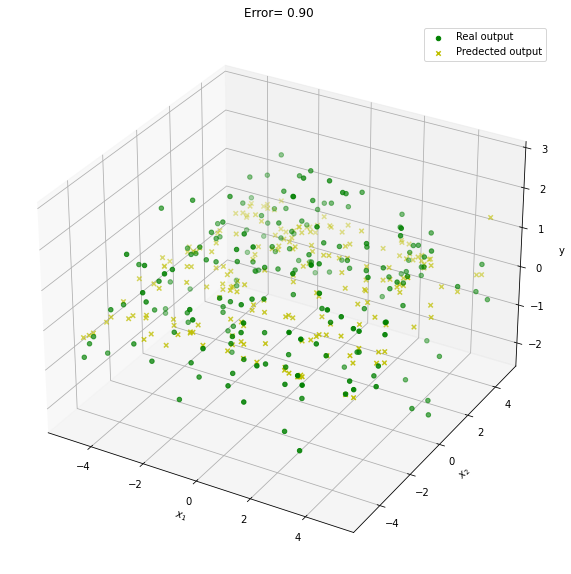

In [30]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter (x1, x2, y, c='g', marker='o')
ax.scatter (x1, x2, y_hat, c='y', marker='x')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('y')
ax.set_title(f'Error= {e:.2f}')
plt.legend(['Real output','Predected output'])

### As a result, ALM selects the x2-x1 model for this data set, which is as expected and its error is 0.9.
### Recall that for Sugeno-Yasukawa and Takagi-Sugeno the error for x2-x1 model was 0.94 and 0.06 respectively.
### So the Takagi-Sugeno model is more accurate than the Sugeno-Yasukawa and ALM. And ALM is more accurate then Sugeno-Yasukawa.
### accuracy: TS > ALM > SY
### In terms of convergence time and complexity, we have the same results as before.

# THANK YOU FOR YOUR PATIENT

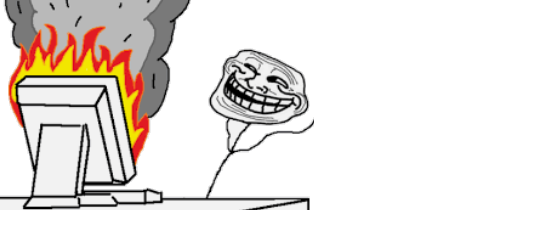

# THE END.
